# Parsing datetime data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/landslides.csv")
df.head()

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0


## Check and handle missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [4]:
df.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [5]:
df = df[~df['date'].isnull()]

In [6]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,NaN,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [7]:
df['time'].value_counts()

time
Night            97
Morning          87
Afternoon        58
Early morning    36
3:00:00          12
                 ..
1:13              1
9:40:00           1
11:50:00          1
                  1
21:06             1
Name: count, Length: 159, dtype: int64

In [8]:
df['time'].isna().sum()

1064

In [9]:
df['time'] = df['time'].fillna("Not Known")
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.0
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.0
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.0
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.0


In [10]:
df['time'].isna().sum()

0

In [11]:
mean = df['fatalities'].mean()
mean

1.4622314622314623

In [12]:
df['fatalities'] = df['fatalities'].fillna(mean)
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Not Known,United States,Ohio,17288,Landslide,Rain,1.462231
2,56,4/6/07,Not Known,United States,Pennsylvania,15930,Landslide,Rain,1.462231
3,59,4/14/07,Not Known,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231
4,61,4/15/07,Not Known,United States,Kentucky,6903,Landslide,Downpour,0.000000
...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,Not Known,United States,North Carolina,1646,Rockfall,NaN,0.000000
1689,7537,2/22/16,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.000000
1690,7539,2/23/16,Not Known,United States,West Virginia,2406,Landslide,Rain,0.000000
1691,7540,2/26/16,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.000000


In [13]:
df['fatalities'].isna().sum()

0

## Date time parsing using .to_datetime()

In [21]:
df['date'] = pd.to_datetime(df.date, format= "%m/%d/%y")

<Axes: ylabel='Frequency'>

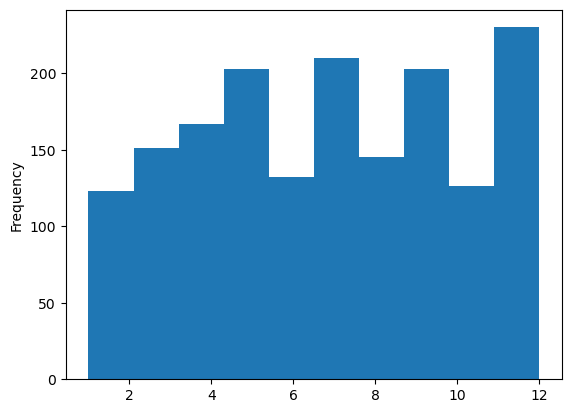

In [29]:
df['date'].dt.month.plot(kind="hist")

## Next challenge seems to be missing

In [41]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    pd.reset_option('display.max_rows')

In [42]:
print_full(df.time.value_counts())

time
Not Known         1064
Night               97
Morning             87
Afternoon           58
Early morning       36
3:00:00             12
Evening             10
19:00:00             9
evening              8
18:00:00             8
10:00:00             8
2:00:00              7
Late night           7
Overnight            6
23:30:00             6
15:00:00             6
16:00:00             6
5:00:00              6
12:00:00             5
21:00:00             5
6:00:00              5
8:00:00              5
13:00                5
19:30:00             5
2:30:00              5
9:30:00              5
21:30:00             4
17:30:00             4
15:00                4
9:00:00              3
21:00                3
22:30                3
21:30                3
20:30:00             3
2:00                 3
23:00:00             3
3:00                 3
15:30                3
4:30:00              3
8:30                 3
4:00:00              3
16:30                3
0:00:00              3
11:00:

In [134]:
from datetime import datetime, time
def fix_time(t):
    if (t == "Not Known"):
        return t
    if t.startswith("Late"):
        t = t.replace("Late ", '')
    if t.startswith("Early"):
        t = t.replace("Early ", '')
    if t.capitalize() in ["Morning", "Afternoon", "Evening", "Night"]:
        return t.capitalize()
    map = {"Overnight":"Night","overnight":"Night", "Before dawn": "Morning"}
    if t in map:
        return map[t]
    try:
        my_time = datetime.strptime(t, '%H:%M')
    except ValueError:
        try:
            my_time = datetime.strptime(t, '%H:%M:%S')
        except ValueError:
            print(t)
            return "Not Known"
    if my_time.time() < time(6,0) or my_time.time() > time(22,0):
        return "Night"        
    elif my_time.time() < time(12,0):
        return "Morning"
    elif my_time.time() <= time(18,0):
        return "Afternoon"
    elif my_time.time() <= time(22,0):
        return "Evening"

In [135]:
df['fixed_time'] = df.time.apply(fix_time)


 
****
Unknown


In [130]:
print_full(df[['time', 'fixed_time']])

,time,fixed_time
0,Night,Night
1,Not Known,Not Known
2,Not Known,Not Known
3,Not Known,Not Known
4,Not Known,Not Known
5,Not Known,Not Known
6,Not Known,Not Known
7,Not Known,Not Known
8,Not Known,Not Known
9,Not Known,Not Known


In [131]:
df.fixed_time.value_counts()

fixed_time
Not Known    1069
Night         203
Morning       189
Afternoon     155
Evening        74
Name: count, dtype: int64

In [132]:
known = df[df['time'] != "Not Known"]
print_full(known[['time', 'fixed_time']])

,time,fixed_time
0,Night,Night
14,Night,Night
74,19:30:00,Evening
168,Night,Night
174,Early morning,Morning
175,1:41:00,Night
178,Afternoon,Afternoon
180,Early morning,Morning
181,11:30:00,Morning
182,Early morning,Morning


In [54]:
my_time = '05:43:34'

my_time = datetime.strptime(my_time, '%H:%M:%S')

In [59]:
from datetime import datetime
try:
    datetime.strptime("4:30:30", '%H:%M')
except ValueError:
    print ("nope")

nope


In [72]:
"Not Known".capitalize()

'Not known'

datetime.time(20, 30, tzinfo=<UTC>)

In [112]:
from datetime import date, time
time(12,0)

datetime.time(12, 0)